# Survival Analysis
#### Source: Alves de Resende, Diogo (2023). "Data Mining for Business Analytics & Data Analysis in Python", Udemy

Survival analysis is a branch of statistics for analyzing the time until one event occurs, such as death in biological organisms and failure in mechanical systems. It is a must for subscripation based businesses like Netflix or Spotify and very apt to study customer churn (rotación de clientes)

Examples: 
- get an email voucher with 40% off exactly 7 days after a subscription is over. why not 15 or 30 days? one way to compute the timing window when you should send a voucher to recover your subscripation customer is survival analysis
- when you try to cancel Amazon subscription, you are inmediatly offered a discount to persude you to stay.
- in the insurance industry they have to compute the risk which is measured by the likelihood of someone presenting a claim which is factored by all along they have the insurance policy
- banks can estimate someone's credit risk default likelihood by how long they have been with a bank

the section focus on time to event type data. Time to event data is when you have a classification problem. when time is crucial.  imagine a customer decides to cancel their subscripaitno. how long do you wait until you try to get that customer?

<div>
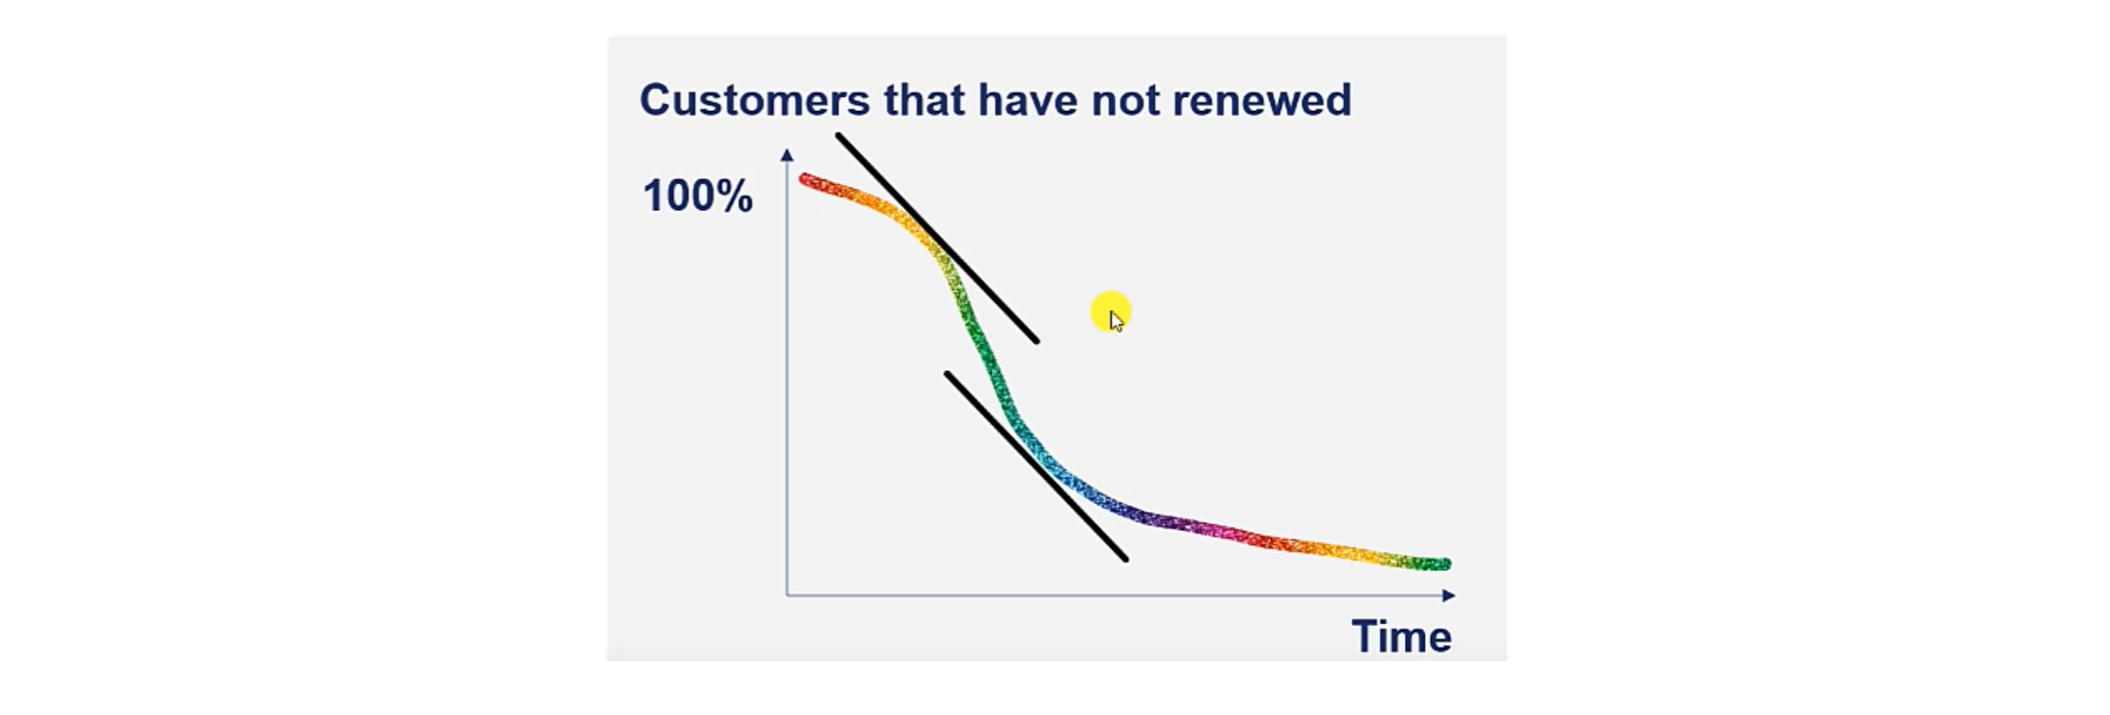
</div>

## Case of study: Lung Cancer

Survival in patientes with advanced lung cancer from the North Centrla Cancer Treatment Group. Performance scores rate how well the patient can perform usual daily activities. objectives:

- Determine the survival curve through the Kaplan Meyer Estimator
- Understand differences between Males and Females

### 1. Prepare Datasets

#### Set directory

In [11]:
%cd C:\Users\jilli\Desktop\PROJECTS\5_DATA_MINING\Data Mining for Business in Python-20221025T033547Z-001\Data Mining for Business in Python\1. Survival Analysis

C:\Users\jilli\Desktop\PROJECTS\5_DATA_MINING\Data Mining for Business in Python-20221025T033547Z-001\Data Mining for Business in Python\1. Survival Analysis


#### Install and import libraries

In [ ]:
#install library
!pip install lifelines #lifelines is a complete survival analysis library, written in pure Python. 

In [12]:
#import libraries
import pandas as pd

#### Import data

In [53]:
#import dataset
dataset = pd.read_csv("lung.csv")
dataset.head()                                   

,inst,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss
0,3.0,306,2,74,1,1.0,90.0,100.0,1175.0,NaN
1,3.0,455,2,68,1,0.0,90.0,90.0,1225.0,15.0
2,3.0,1010,1,56,1,0.0,90.0,90.0,NaN,15.0
3,5.0,210,2,57,1,1.0,90.0,60.0,1150.0,11.0
4,1.0,883,2,60,1,0.0,100.0,90.0,NaN,0.0


Variables:
- inst: Institution code
- time: Survival time in days (time a person survive)
- status: censoring status 1=censored, 2=dead (1 alive 2 dead)

characteristis of the person
- age: Age in years
- sex: Male=1 Female=2
- ph.ecog: ECOG performance score as rated by the physician. 0=asymptomatic, 1= symptomatic but completely ambulatory, 2= in bed <50% of the day, 3= in bed > 50% of the day but not bedbound, 4 = bedbound
- ph.karno: Karnofsky performance score (bad=0-good=100) rated by physician
- pat.karno: Karnofsky performance score as rated by patient
- meal.cal: Calories consumed at meals
- wt.loss: Weight loss in last six months

Example: the person 1 lived 306 days and now is dead. 

In [54]:
#transform dependent variable into 1 and 0
dataset.loc[dataset.status == 1, "status"] = 0 ## you need to specify the variable "status"
dataset.loc[dataset.status == 2, "status"] = 1
dataset.head()

,inst,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss
0,3.0,306,1,74,1,1.0,90.0,100.0,1175.0,NaN
1,3.0,455,1,68,1,0.0,90.0,90.0,1225.0,15.0
2,3.0,1010,0,56,1,0.0,90.0,90.0,NaN,15.0
3,5.0,210,1,57,1,1.0,90.0,60.0,1150.0,11.0
4,1.0,883,1,60,1,0.0,100.0,90.0,NaN,0.0


In [57]:
dataset[dataset.time==840] #individuo 70 vivo al dia 840... no murio durante el periodo evaluado, entonces se censura *se quita()

,inst,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss
70,13.0,840,0,63,1,0.0,90.0,90.0,1175.0,-1.0


### 2. Kaplan Meier Estimator (KME)

It computes the probability of someone surviving for a particular day
- Probability of surviving after being diagnosed 
- Probability of coming back after a person stopped their subscription

KME is a non-parametric statistic used to estimate the survival function (probability of a person surviving) from the lifetime data. 

In medican research, it is often used to meaure the fraction of patines living for a specific time after treatment or diagnosis.

The formula to get KME curve is:

$$S(t_i)=S(t_{i-1})*(1-\frac{d_i}{n_i})$$ 
where di = number of events at a time and ni = number of survivors or people at a time t

The KME gives me the probability of me of surviving today, which depends of the probability of me of surviving yesterday. The probability of surviving today is higher than the probability of surving yesterday. It decreases over time

### censoring 

Right censoring occurs when a subject leaves the study before an event occurs,
or the study ends before the event has occurred. For example, we consider
patients in a clinical trial to study the e§ect of treatments on stroke occurrence. The study ends after 5 years. Those patients who have had no strokes by the end of the year are censored

the subject under observation is still alive until they are dead.
or someone has not reenewed their subscription until they do

A patient who does not experience the event of interest for the duration of the study is said to be “right censored”

Left censoring is when the event of interest has already occurred before
enrolment. This is very rarely encountered.
the event cannot be observed for some reason. the event may also have started before  recording
we do not know when coronavirus started, antovodies are over, and you can have coronavirus again. Now you did some test and know that you had it

interval censoring: you only have data for a specific interval. you can have coronavirus but you do not know it and do not record. you have antibodies

In [37]:
#KME
from lifelines import KaplanMeierFitter
model = KaplanMeierFitter()
## durations = time (time of surviving)
##  event_observed = status (dependent variable)
model.fit(durations = dataset.time,
          event_observed = dataset.status)
model.event_table.head(840)

# at_risk is the surviving curve
# we recorded not every single day, they were recorded at 0,5,11...
# start with 228 (entrance) Probability of surviving (event=0=vivo) =100%,
    # 1 person (observed) died so he was removed... we have now 227 people
# then we have 3 people observed who died, so we removed 3 people and we have now 224
# in 840, we have 1 person censored (we do not know what actually happened) so we removed it ...
    # #individuo 70 vivo al dia 840... no murio (vivo status 0), entonces se censura *se quita()

,removed,observed,censored,entrance,at_risk
event_at,,,,,
0.0,0,0,0,228,228
5.0,1,1,0,0,228
11.0,3,3,0,0,227
12.0,1,1,0,0,224
13.0,2,2,0,0,223
...,...,...,...,...,...
840.0,1,0,1,0,5
883.0,1,1,0,0,4
965.0,1,0,1,0,3


In [58]:
dataset[dataset.time==840] #individuo 70 vivo al dia 840... no murio durante el periodo evaluado, entonces se censura *se quita()

,inst,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss
70,13.0,840,0,63,1,0.0,90.0,90.0,1175.0,-1.0


### Compute individual probabilities of surviving 

calculate for specific events. 
Probability of surviving (event=0) =100%

In [17]:
# Probability of surviving day 5
day_5 = model.event_table.iloc[1, :]
print(day_5) # al día 5 habían 228 en riesgo, 1 fue removido, 1 observado

removed       1
observed      1
censored      0
entrance      0
at_risk     228
Name: 5.0, dtype: int32


In [18]:
 #Formula Sti = 1*(1- observados o muertos al dia 5/ cant gente al dia 5 )
surv_5 = 1 * (1- day_5.observed / day_5.at_risk)
print(surv_5)

0.9956140350877193


In [20]:
# Probability of surviving day 11
day_11 = model.event_table.iloc[2, :]
print(day_11)

removed       3
observed      3
censored      0
entrance      0
at_risk     227
Name: 11.0, dtype: int32


In [21]:
surv_11 = surv_5 * (1 - day_11.observed / day_11.at_risk)
print(surv_11)

0.9824561403508771


In [22]:
#Approximation: #(gentetotal-genteobservada)/gente total
surv_11_approximate = (day_11.at_risk - day_11.observed) / day_11.at_risk
surv_11_approximate

0.986784140969163

#Visualization

Text(0, 0.5, 'Survival')

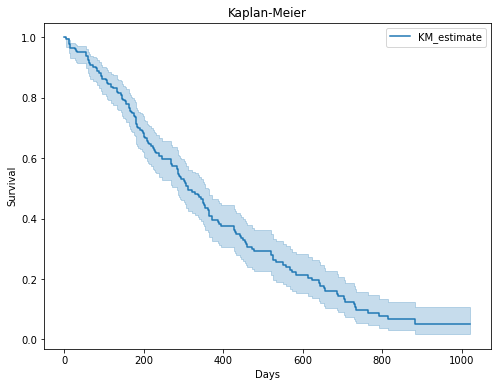

In [23]:
#plotting survival curve
import matplotlib.pyplot as plt
model.plot(figsize = (8,6))
plt.title("Kaplan-Meier")
plt.xlabel("Days")
plt.ylabel("Survival")
# a los 600 dias de una persona que tiene cancer tiene la probabilidad
# de sobrevivir de aprox 0.2

Text(0, 0.5, 'Survival')

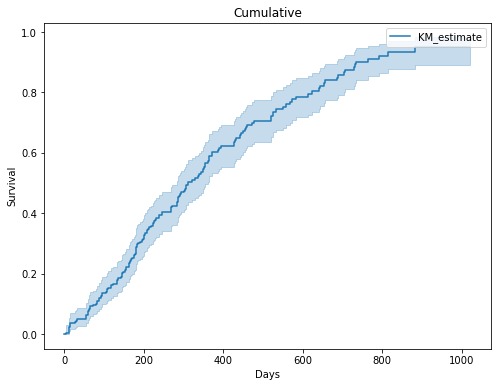

In [24]:
#plotting survival curve : probabilidad acumulada
#cumulative death en el dia 1000 la probabilidad de que todos estén muertos es 1
import matplotlib.pyplot as plt
model.plot_cumulative_density(figsize = (8,6))
plt.title("Cumulative")
plt.xlabel("Days")
plt.ylabel("Survival")

#Male vs Female

To test if there are statistical differences in the survivial distributions of 2 or more groups. Ho = no hay diferencias significativas entre ambos grupos. si P values > 0.5 no differences (=same)

In [25]:
#create DF with males and Females
# The query() method takes a query expression as a string parameter,
# which has to evaluate to either True of False. 
# It returns the DataFrame where the result is True according to the query expression.

male = dataset.query("sex == 1")
female = dataset.query("sex == 2") #hago dataset que solo contenga mujeres
female.head()

,inst,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss
6,7.0,310,1,68,2,2.0,70.0,60.0,384.0,10.0
7,11.0,361,1,71,2,2.0,60.0,80.0,538.0,1.0
11,16.0,654,1,68,2,2.0,70.0,70.0,NaN,23.0
12,11.0,728,1,68,2,1.0,90.0,90.0,NaN,5.0
18,1.0,61,1,56,2,2.0,60.0,60.0,238.0,10.0


In [26]:
#Kaplan - Meier per gender
#KME
model_males = KaplanMeierFitter()
model_males.fit(durations = male.time,
                event_observed = male.status)
model_females = KaplanMeierFitter()
model_females.fit(durations = female.time,
                  event_observed = female.status)

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 90 total observations, 37 right-censored observations>

Text(0, 0.5, 'Survival')

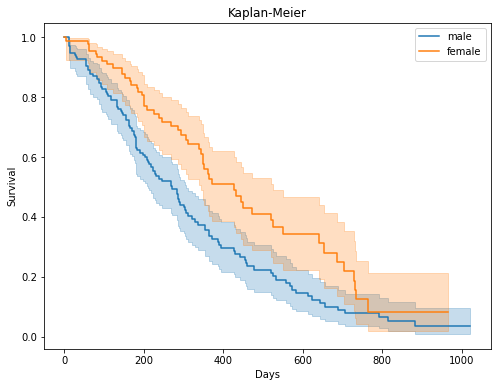

In [27]:
#plotting survival curve
import matplotlib.pyplot as plt
model_males.plot(figsize = (8,6), label = "male")
model_females.plot(label = "female")
plt.title("Kaplan-Meier")
plt.xlabel("Days")
plt.ylabel("Survival")

In [28]:
#Log Rank test
#The log-rank test is a chi-square test that is used to test the 
# null hypothesis that two or more survival curves are statistically 
# equivalant.
from lifelines.statistics import logrank_test
logrank_test(durations_A = male.time,
             durations_B = female.time,
             event_observed_A = male.status,
             event_observed_B = female.status)

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
          10.33 <0.005      9.57

In [ ]:
2. Perform Survival Curve
3. Visualize and interpet results
4. perform log rank test

## Example - Survival Analysis

In 1988, an experiment was designed and implemented at one AT&T factory. The goal was to investigate alternatives in the "wave soldering" procedure for mounting electronic components to printed circuit boards. The response (or dependent variable) is the number of visible solder skips.
1. Variable transformation: The dependent variable (solder variable) needs to be configured to be 0 if the event has not happened, or 1, if it has happened. That is a general rule for Data Mining: the inputs must be numeric 
2. he Kaplan-MeyerEstimator: is the algorithm to compute the Curves. The goal is to measure the time until the event occurs
3. Visualization: Plotting is of the key outputs of a typical survival analysis model. The usual shape is an inverted S. The goal is to see how long until a significant portion of the events start happening and until when is it expected for the event to happen.
4. log-rank test: we can often segment the data into gender, age, clusters, etc. The log-rank test aims to test whether there are significant differences among the different groups. We need to use the function multivariate_logrank_test. Have a look and explore to see how it works.


In [33]:
# set directory
%cd C:\Users\jilli\Desktop\PROJECTS\5_DATA_MINING\Data Mining for Business in Python-20221025T033547Z-001\Data Mining for Business in Python\1. Survival Analysis

# Libraries !pip install lifelines
import pandas as pd
import statsmodels.api as sm

#import dataset
dataset = pd.read_csv("solder.csv")
dataset.head(10)  

C:\Users\jilli\Desktop\PROJECTS\5_DATA_MINING\Data Mining for Business in Python-20221025T033547Z-001\Data Mining for Business in Python\1. Survival Analysis


,Opening,Solder,Mask,PadType,Panel,skips
0,L,Thick,A1.5,W4,1,0
1,L,Thick,A1.5,W4,2,0
2,L,Thick,A1.5,W4,3,0
3,L,Thick,A1.5,D4,1,0
4,L,Thick,A1.5,D4,2,0
5,L,Thick,A1.5,D4,3,0
6,L,Thick,A1.5,L4,1,0
7,L,Thick,A1.5,L4,2,0
8,L,Thick,A1.5,L4,3,0
9,L,Thick,A1.5,D6,1,0


In [30]:
#transform dependent variable into 1 and 0 ("el status: grueso o delgado, vivo o muerto")
#option 1
dataset.loc[dataset.Solder == "Thick" , "Solder"] = 0
dataset.loc[dataset.Solder == "Thin", "Solder"] = 1
dataset.head()

#option 2 
#import numpy as np
#dataset["Solder"] = np.where(dataset["Solder"] == "Thin", 1, 0)
#dataset.head()*/

,Opening,Solder,Mask,PadType,Panel,skips
0,L,0,A1.5,W4,1,0
1,L,0,A1.5,W4,2,0
2,L,0,A1.5,W4,3,0
3,L,0,A1.5,D4,1,0
4,L,0,A1.5,D4,2,0


In [32]:
#KME
from lifelines import KaplanMeierFitter
model = KaplanMeierFitter()
model.fit(durations = dataset.skips, #x variable  skips
          event_observed = dataset.Solder) #dependent variable obsrvable 0 or 1

#("el status: solder grueso o delgado, vivo o muerto") at risk
# skips es duration: cantida de dias que persona sobrevive
# al incicio 203 eran censurados....?
model.event_table.head(20)

C:\Users\jilli\anaconda3\lib\site-packages\lifelines\utils\__init__.py:1187: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)


,removed,observed,censored,entrance,at_risk
event_at,,,,,
0,285,82,203,900,900
1,123,54,69,0,615
2,90,43,47,0,492
3,45,29,16,0,402
4,42,28,14,0,357
5,39,24,15,0,315
6,30,16,14,0,276
7,32,21,11,0,246
8,26,16,10,0,214


Text(0.5, 0, 'Skips')

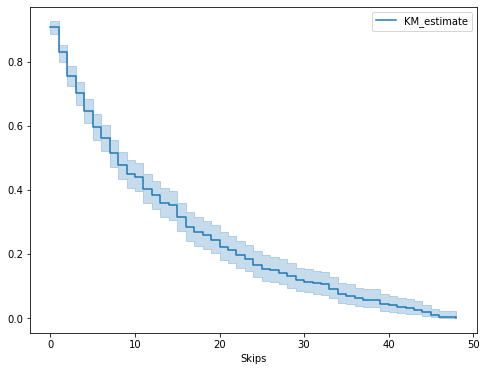

In [27]:
#visuliazation
import matplotlib.pyplot as plt
model.plot(figsize = (8,6))
plt.xlabel("Skips") 
# a los 30 skips tiene probabliad = 0  de thick de 0,2 . al principio al partir incia con pr de 0.9 aproz
# inician 900 con pr()=0 casi todos. quiero ver cuantos se van convirtiendo a 1. 203 fueron censurados porque 